In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import glob
from scipy.stats.mstats import linregress
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
files=sorted(glob.glob('/home/z5241410/Desktop/UNSW/CERES_data/FluxByCld_CERES/Cloud_data/CERES_FluxByCldTyp_*.nc'))
ds1=xr.open_mfdataset(files,combine='nested',concat_dim='time')

In [3]:
cldarea=ds1.cldarea_cldtyp_mon
lat=ds1.lat
lon=ds1.lon

In [4]:
def take_anom(arg):
    anom=(arg.groupby('time.month'))-(arg.groupby('time.month').mean('time'))
    return(anom)

In [5]:
cldarea_a=take_anom(cldarea)

In [6]:
a=cldarea_a[:,:,3:7,:,:].mean('time')
b=cldarea_a[:,:,15:19,:,:].mean('time')
c=cldarea_a[:,:,27:31,:,:].mean('time')
d=cldarea_a[:,:,39:43,:,:].mean('time')
e=cldarea_a[:,:,51:55,:,:].mean('time')
f=cldarea_a[:,:,63:67,:,:].mean('time')
g=cldarea_a[:,:,75:79,:,:].mean('time')
h=cldarea_a[:,:,87:91,:,:].mean('time')
i=cldarea_a[:,:,99:103,:,:].mean('time')
j=cldarea_a[:,:,111:115,:,:].mean('time')
k=cldarea_a[:,:,123:127,:,:].mean('time')
l=cldarea_a[:,:,135:139,:,:].mean('time')
m=cldarea_a[:,:,147:151,:,:].mean('time')
n=cldarea_a[:,:,159:163,:,:].mean('time')
o=cldarea_a[:,:,171:175,:,:].mean('time')
p=cldarea_a[:,:,183:187,:,:].mean('time')
q=cldarea_a[:,:,195:199,:,:].mean('time')
r=cldarea_a[:,:,207:210,:,:].mean('time')

In [7]:
wt = np.cos(np.tile(abs(lat.values[:,None])*np.pi/180,(1,len(lon))))

In [8]:
con=xr.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r],dim='time')
con1=wt*con

In [10]:
con1.to_netcdf('ONDJavg_wt_FlxByCldTyp_repeat.nc')

/home/z5241410/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [11]:
ds=xr.open_dataset('ONDJavg_wt_FlxByCldTyp_repeat.nc')

In [12]:
C1=ds.cldarea_cldtyp_mon[:,0:2,4:7,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C1---tropical average of cirrus
C2=ds.cldarea_cldtyp_mon[:,2:4,4:7,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C2---tropical average of cirrostratus
C3=ds.cldarea_cldtyp_mon[:,4:6,4:7,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C3---tropical average of deep convective
C4=ds.cldarea_cldtyp_mon[:,0:2,2:4,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C4---tropical average of alto cumulus
C5=ds.cldarea_cldtyp_mon[:,2:4,2:4,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C5---tropical average of alto stratus
C6=ds.cldarea_cldtyp_mon[:,4:6,2:4,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C6---tropical average of nimbostratus
C7=ds.cldarea_cldtyp_mon[:,0:2,0:2,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C7---tropical average of cumulus
C8=ds.cldarea_cldtyp_mon[:,2:4,0:2,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C8---tropical average of stratocumulus
C9=ds.cldarea_cldtyp_mon[:,4:6,0:2,60:120,:].sum('opt').sum('press').mean('lat').mean('lon')#---C9---tropical average of stratus


In [13]:
times=np.arange(2002,2020)
nin= np.array([27.812,27.005,27.3375,26.0175,27.52,25.09,26.005,28.0425,25.0225,25.6,26.5475,26.39,27.245,29.2175,26.035,25.77,27.4775,27.17])
nino=xr.DataArray(data=nin, coords=[times], dims=['time'])
nino

<xarray.DataArray (time: 18)>
array([27.812 , 27.005 , 27.3375, 26.0175, 27.52  , 25.09  , 26.005 ,
       28.0425, 25.0225, 25.6   , 26.5475, 26.39  , 27.245 , 29.2175,
       26.035 , 25.77  , 27.4775, 27.17  ])
Coordinates:
  * time     (time) int64 2002 2003 2004 2005 2006 ... 2015 2016 2017 2018 2019

In [14]:
def take_anom(arg):
    anom=arg-arg.mean()
    return(anom)

In [15]:
nino_a=take_anom(nino)

0.02815243287022672 -0.11782984690837792 -0.017588416542347714 0.027668657383619986 -0.009531079622486378 -0.0040039368002192325 -0.0007446740312404494 -0.08753508513226353 -0.012469504797920973


Text(0.5, 1.0, 'Tropical average')

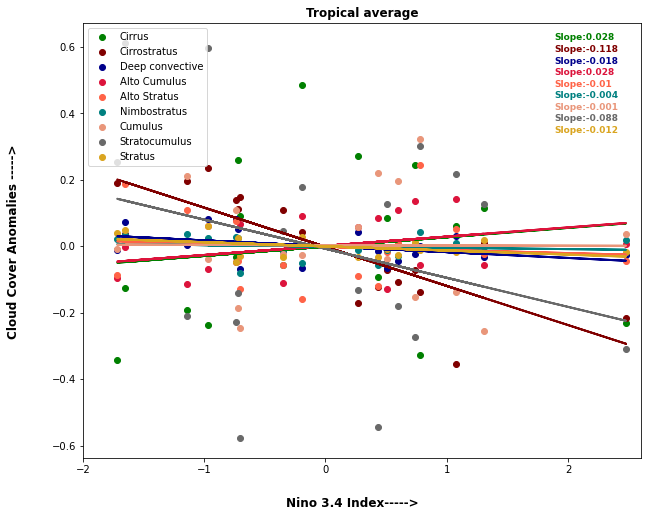

In [16]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(nino_a, C1,color='green',label='Cirrus')
slope1,intercept1=np.polyfit(nino_a,C1,1)
Y1=slope1*nino_a+intercept1
ax.plot(nino_a,Y1,color='green',linewidth=2)

ax.scatter(nino_a,C2,color='maroon',label='Cirrostratus')
slope2,intercept2=np.polyfit(nino_a,C2,1)
Y2=slope2*nino_a+intercept2
ax.plot(nino_a,Y2,color='maroon',linewidth=2)

ax.scatter(nino_a,C3,color='darkblue',label='Deep convective')
slope3,intercept3=np.polyfit(nino_a,C3,1)
Y3=slope3*nino_a+intercept3
ax.plot(nino_a,Y3,color='darkblue',linewidth=2)

ax.scatter(nino_a,C4,color='crimson',label='Alto Cumulus')
slope4,intercept4=np.polyfit(nino_a,C4,1)
Y4=slope4*nino_a+intercept4
ax.plot(nino_a,Y4,color='crimson',linewidth=2)#tomato,darksalmon,sienna,teal


ax.scatter(nino_a,C5,color='tomato',label='Alto Stratus')
slope5,intercept5=np.polyfit(nino_a,C5,1)
Y5=slope5*nino_a+intercept5
ax.plot(nino_a,Y5,color='tomato',linewidth=2)

ax.scatter(nino_a,C6,color='teal',label='Nimbostratus')
slope6,intercept6=np.polyfit(nino_a,C6,1)
Y6=slope6*nino_a+intercept6
ax.plot(nino_a,Y6,color='teal',linewidth=2)

ax.scatter(nino_a,C7,color='darksalmon',label='Cumulus')
slope7,intercept7=np.polyfit(nino_a,C7,1)
Y7=slope7*nino_a+intercept7
ax.plot(nino_a,Y7,color='darksalmon',linewidth=2)

ax.scatter(nino_a,C8,color='dimgrey',label='Stratocumulus')
slope8,intercept8=np.polyfit(nino_a,C8,1)
Y8=slope8*nino_a+intercept8
ax.plot(nino_a,Y8,color='dimgrey',linewidth=2)

ax.scatter(nino_a,C9,color='goldenrod',label='Stratus')
slope9,intercept9=np.polyfit(nino_a,C9,1)
Y9=slope9*nino_a+intercept9
ax.plot(nino_a,Y9,color='goldenrod',linewidth=2)

ax.legend()
ax.legend(loc='upper left')

print(slope1,slope2,slope3,slope4,slope5,slope6,slope7,slope8,slope9)

fig.text(0.78, 0.85, 'Slope:0.028', ha='left',size=9,fontweight='bold',color='green')
fig.text(0.78, 0.83, 'Slope:-0.118', ha='left',size=9,fontweight='bold',color='maroon')
fig.text(0.78, 0.81, 'Slope:-0.018', ha='left',size=9,fontweight='bold',color='darkblue')
fig.text(0.78, 0.79, 'Slope:0.028', ha='left',size=9,fontweight='bold',color='crimson')
fig.text(0.78, 0.77, 'Slope:-0.01', ha='left',size=9,fontweight='bold',color='tomato')
fig.text(0.78, 0.75, 'Slope:-0.004', ha='left',size=9,fontweight='bold',color='teal')
fig.text(0.78, 0.73, 'Slope:-0.001', ha='left',size=9,fontweight='bold',color='darksalmon')
fig.text(0.78, 0.71, 'Slope:-0.088', ha='left',size=9,fontweight='bold',color='dimgrey')
fig.text(0.78, 0.69, 'Slope:-0.012', ha='left',size=9,fontweight='bold',color='goldenrod')

plt.xlim(-2,2.6)

fig.text(0.02, 0.5, 'Cloud Cover Anomalies ----->', va='center', rotation='vertical',size=12,fontweight='bold')
fig.text(0.5, 0.04, 'Nino 3.4 Index----->', ha='center',size=12,fontweight='bold')
plt.title('Tropical average',fontweight='bold')

#plt.savefig('rep11',dpi=300, bbox_inches='tight')

In [17]:
def linear_regression(x,y):
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    return [slope,rvalue,pvalue,stderr]


In [18]:
linear_regression(nino,C1)

[0.028152432870226732,
 0.1374151406753567,
 0.5866208805430874,
 0.05073197518995345]

In [19]:
linear_regression(nino,C2)

[-0.11782984690837799,
 -0.7935176995935656,
 8.491163707728459e-05,
 0.022590869787353654]

In [20]:
linear_regression(nino,C3)

[-0.01758841654234772,
 -0.3902345588056813,
 0.10937738515712632,
 0.010374483087492635]

In [21]:
linear_regression(nino,C4)

[0.027668657383619996,
 0.33696333372130666,
 0.1715097537218118,
 0.019327423787031898]

In [22]:
linear_regression(nino,C5)

[-0.009531079622486394,
 -0.09672231308189048,
 0.7026133242472599,
 0.024519658271811087]

In [23]:
linear_regression(nino,C6)

[-0.004003936800219238,
 -0.12645341442087707,
 0.6170780745850768,
 0.00785228972244279]

In [24]:
linear_regression(nino,C7)

[-0.0007446740312404326,
 -0.004981857138997036,
 0.9843474637429371,
 0.03736883502532799]

In [25]:
linear_regression(nino,C8)

[-0.08753508513226362,
 -0.28374135131918354,
 0.2538548438424034,
 0.0739559702836138]

In [26]:
linear_regression(nino,C9)

[-0.012469504797920979,
 -0.42973796034420975,
 0.07509525258673125,
 0.006550145583201517]